In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='red', linestyle='--')
    plt.axhline(md - 1.96*sd, color='red', linestyle='--')

In [3]:
importance_pd=pd.read_json("all_norm_Importance.json")
importance_pd

,shap,lime,lgbm,dice_global
cough,0.231779,0.020908,0.071429,0.1
fever,1.000000,0.215963,0.500000,0.5
sore_throat,0.094010,0.123108,0.071429,0.0
shortness_of_breath,0.251110,1.000000,0.857143,1.0
head_ache,0.244096,0.392729,0.142857,0.6
age_60_and_above,0.128136,0.090408,1.000000,0.4
gender,0.044857,0.002714,0.142857,0.2
Contact with confirmed,0.916082,0.332299,0.214286,0.9


In [4]:
import scipy as sc

In [5]:
print(f'the shapiro Test result of shap is :  {sc.stats.shapiro(importance_pd.shap)}')
print(f'the shapiro Test result of lime is :  {sc.stats.shapiro(importance_pd.lime)}')
print(f'the shapiro Test result of lgbm is :  {sc.stats.shapiro(importance_pd.lgbm)}')
print(f'the shapiro Test result of dice global is :  {sc.stats.shapiro(importance_pd.dice_global)}')

the shapiro Test result of shap is :  ShapiroResult(statistic=0.751720666885376, pvalue=0.008534017018973827)
the shapiro Test result of lime is :  ShapiroResult(statistic=0.7961695194244385, pvalue=0.026042886078357697)
the shapiro Test result of lgbm is :  ShapiroResult(statistic=0.803885817527771, pvalue=0.03149785101413727)
the shapiro Test result of dice global is :  ShapiroResult(statistic=0.9490872025489807, pvalue=0.7020240426063538)


In [67]:
# P_ value  dpr shap is smaller that 0.05 --> reject normality assumption
# P_ value  dpr lgbm is smaller that 0.05 --> reject normality assumption
# P_ value  dpr lime global is smaller that 0.05 --> reject normality assumption
# we do logratim transformation


(array([3., 1., 2., 0., 0., 0., 0., 0., 0., 2.]),
 array([0.04485682, 0.14037114, 0.23588545, 0.33139977, 0.42691409,
        0.52242841, 0.61794273, 0.71345705, 0.80897136, 0.90448568,
        1.        ]),
 <BarContainer object of 10 artists>)

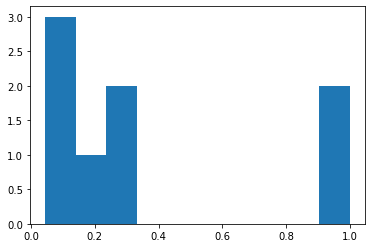

In [6]:
plt.hist(importance_pd.shap)

(array([4., 1., 0., 0., 1., 0., 0., 0., 1., 1.]),
 array([0.07142857, 0.16428571, 0.25714286, 0.35      , 0.44285714,
        0.53571429, 0.62857143, 0.72142857, 0.81428571, 0.90714286,
        1.        ]),
 <BarContainer object of 10 artists>)

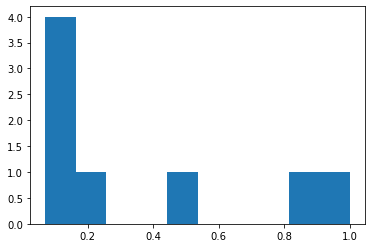

In [7]:
plt.hist(importance_pd.lgbm)

(array([3., 1., 1., 2., 0., 0., 0., 0., 0., 1.]),
 array([0.00271353, 0.10244218, 0.20217083, 0.30189947, 0.40162812,
        0.50135677, 0.60108541, 0.70081406, 0.80054271, 0.90027135,
        1.        ]),
 <BarContainer object of 10 artists>)

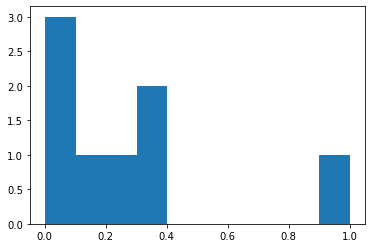

In [9]:
plt.hist(importance_pd.lime)

In [10]:
df_sqrt=pd.DataFrame()

In [11]:
df_sqrt["shap_sqrt"]=importance_pd['shap'].apply(lambda x:np.sqrt(x))
df_sqrt["lgbm_sqrt"]=importance_pd['lgbm'].apply(lambda x:np.sqrt(x))
df_sqrt["lime_sqrt"]=importance_pd['lime'].apply(lambda x:np.sqrt(x))
print(f'the shapiro Test result of shap_sqrt is :  {sc.stats.shapiro(df_sqrt["shap_sqrt"])}')
print(f'the shapiro Test result of lgbm_sqrt is :  {sc.stats.shapiro(df_sqrt["lgbm_sqrt"])}')
print(f'the shapiro Test result of dice_sqrt is :  {sc.stats.shapiro(df_sqrt["lime_sqrt"])}')

the shapiro Test result of shap_sqrt is :  ShapiroResult(statistic=0.8536351919174194, pvalue=0.10367494821548462)
the shapiro Test result of lgbm_sqrt is :  ShapiroResult(statistic=0.8569298982620239, pvalue=0.11188535392284393)
the shapiro Test result of dice_sqrt is :  ShapiroResult(statistic=0.9633336663246155, pvalue=0.8411908149719238)


In [12]:
df_sqrt

,shap_sqrt,lgbm_sqrt,lime_sqrt
cough,0.481434,0.267261,0.144595
fever,1.000000,0.707107,0.464718
sore_throat,0.306610,0.267261,0.350868
shortness_of_breath,0.501109,0.925820,1.000000
head_ache,0.494060,0.377964,0.626681
age_60_and_above,0.357961,1.000000,0.300679
gender,0.211794,0.377964,0.052092
Contact with confirmed,0.957122,0.462910,0.576454


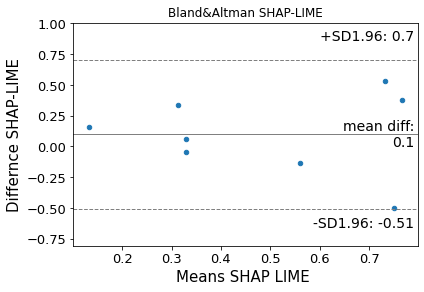

In [18]:
sm.graphics.mean_diff_plot(df_sqrt.shap_sqrt,df_sqrt.lime_sqrt)
plt.xlabel("Means SHAP LIME ")
plt.ylabel("Differnce SHAP-LIME")
plt.title("Bland&Altman SHAP-LIME")
plt.show()


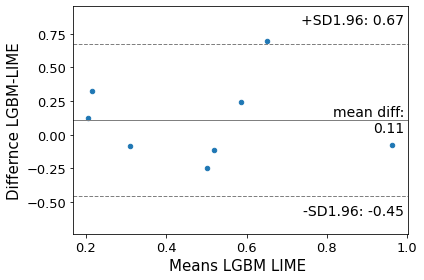

In [15]:
sm.graphics.mean_diff_plot(df_sqrt.lgbm_sqrt,df_sqrt.lime_sqrt)
plt.xlabel("Means LGBM LIME ")
plt.ylabel("Differnce LGBM-LIME")
plt.show()


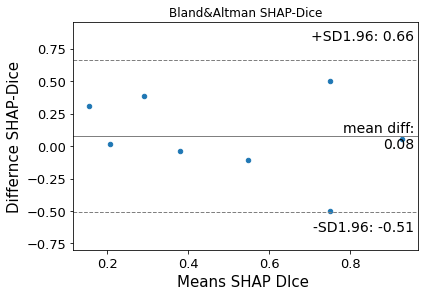

In [19]:
sm.graphics.mean_diff_plot(df_sqrt.shap_sqrt,importance_pd.dice_global)
plt.xlabel("Means SHAP DIce ")
plt.ylabel("Differnce SHAP-Dice")
plt.title("Bland&Altman SHAP-Dice")
plt.show()